In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#import seaborn as sns
#import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [2]:
data=pd.read_csv("house_prices_data_training_data.csv")
data.dropna()
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dropna(axis=0, how='any', thresh= None, subset= None, inplace=True)

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6.414100e+09,20150108T000000,320000.0,2.0,1.00,1802.0,11225.0,1.0,0.0,0.0,...,7.0,1802.0,0.0,1961.0,0.0,98125.0,47.7205,-122.323,1810.0,7332.0
17995,1.346300e+09,20140626T000000,1990000.0,5.0,3.00,4480.0,5000.0,2.5,0.0,0.0,...,12.0,3420.0,1060.0,1902.0,0.0,98112.0,47.6275,-122.315,3220.0,5600.0
17996,2.212210e+09,20140702T000000,253000.0,2.0,1.00,1310.0,7128.0,1.0,0.0,0.0,...,7.0,940.0,370.0,1980.0,0.0,98031.0,47.3958,-122.189,1400.0,7161.0
17997,2.050004e+08,20140915T000000,630000.0,3.0,2.50,2320.0,32772.0,2.0,0.0,0.0,...,9.0,2320.0,0.0,1992.0,0.0,98053.0,47.6304,-121.988,2610.0,33305.0


In [5]:
correlation_table= data.corr()
correlation_table

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015349,0.002968,0.004132,-0.011647,-0.134774,0.015786,-0.002179,0.012762,-0.020641,0.006744,-0.011529,-0.002734,0.021260,-0.020168,-0.010725,-0.004442,0.011044,-0.011673,-0.144172
price,-0.015349,1.000000,0.302998,0.523706,0.701492,0.088863,0.280903,0.275296,0.403321,0.047493,0.662583,0.604963,0.324877,0.036774,0.137104,-0.042484,0.309013,0.011829,0.599256,0.078733
bedrooms,0.002968,0.302998,1.000000,0.518975,0.563960,0.029706,0.208355,-0.000120,0.084015,0.032531,0.357633,0.457610,0.312698,0.162714,0.023341,-0.139447,0.002399,0.110804,0.373918,0.026047
bathrooms,0.004132,0.523706,0.518975,1.000000,0.761185,0.092881,0.503779,0.075441,0.202049,-0.093526,0.659452,0.684892,0.301539,0.484680,0.069777,-0.202740,0.024802,0.221787,0.578656,0.093108
sqft_living,-0.011647,0.701492,0.563960,0.761185,1.000000,0.171436,0.400094,0.115717,0.294186,-0.047880,0.767729,0.867604,0.453788,0.324299,0.068040,-0.179350,0.062952,0.217911,0.752655,0.183090
sqft_lot,-0.134774,0.088863,0.029706,0.092881,0.171436,1.000000,0.022333,0.021800,0.069300,-0.019925,0.120176,0.187710,0.007957,0.082907,0.005654,-0.127868,-0.085148,0.229418,0.154483,0.701012
floors,0.015786,0.280903,0.208355,0.503779,0.400094,0.022333,1.000000,0.035147,0.053143,-0.220214,0.463205,0.579794,-0.235400,0.416793,0.034917,-0.080677,0.034106,0.163102,0.326940,0.018859
waterfront,-0.002179,0.275296,-0.000120,0.075441,0.115717,0.021800,0.035147,1.000000,0.401187,0.011109,0.089171,0.084253,0.081442,-0.016935,0.086466,0.033757,-0.014013,-0.044603,0.091463,0.030377
view,0.012762,0.403321,0.084015,0.202049,0.294186,0.069300,0.053143,0.401187,1.000000,0.038997,0.261069,0.178029,0.271859,-0.038771,0.103100,0.090166,0.004867,-0.084820,0.291409,0.066526
condition,-0.020641,0.047493,0.032531,-0.093526,-0.047880,-0.019925,-0.220214,0.011109,0.038997,1.000000,-0.125651,-0.145523,0.164615,-0.315515,-0.073901,-0.001262,-0.017790,-0.106673,-0.089569,-0.016417


In [6]:
#Correlation with output variable
cor_target = abs(correlation_table["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
bathrooms        0.523706
sqft_living      0.701492
grade            0.662583
sqft_above       0.604963
sqft_living15    0.599256
Name: price, dtype: float64

In [7]:
#drop features that have correlation <0.5
data = data.drop(["id","date","bedrooms","sqft_lot","floors","waterfront","view","condition","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_lot15"] , axis = 1)
data

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180.0,7.0,1180.0,1340.0
1,538000.0,2.25,2570.0,7.0,2170.0,1690.0
2,180000.0,1.00,770.0,6.0,770.0,2720.0
3,604000.0,3.00,1960.0,7.0,1050.0,1360.0
4,510000.0,2.00,1680.0,8.0,1680.0,1800.0
...,...,...,...,...,...,...
17994,320000.0,1.00,1802.0,7.0,1802.0,1810.0
17995,1990000.0,3.00,4480.0,12.0,3420.0,3220.0
17996,253000.0,1.00,1310.0,7.0,940.0,1400.0
17997,630000.0,2.50,2320.0,9.0,2320.0,2610.0


In [8]:
#convert data frame to array
array = data.to_numpy()
X = array[:,1:]
Y = array[:,0]

print("Size of features array = {} ".format(X.shape))
print("Size of output array = {} ".format(Y.shape))
Y

Size of features array = (17999, 5) 
Size of output array = (17999,) 


array([221900., 538000., 180000., ..., 253000., 630000., 216000.])

In [9]:
# Dividing into 60% Trainning set and 40% the rest.
trainX, restX, trainY, restY = train_test_split(X, Y, test_size = 0.4, shuffle = False) 

# Dividing the remaining 40% into 20% Testing set and 20% validation set.
validateX , testX, validateY, testY = train_test_split(restX, restY, test_size = 0.5, shuffle = False)

In [10]:
trainX

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03, 1.34e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03, 1.69e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02, 2.72e+03],
       ...,
       [2.00e+00, 2.23e+03, 9.00e+00, 2.23e+03, 2.51e+03],
       [1.75e+00, 1.80e+03, 7.00e+00, 1.42e+03, 1.62e+03],
       [2.50e+00, 2.40e+03, 8.00e+00, 1.53e+03, 1.71e+03]])

In [11]:
def  featureNormalize(X):
   
   
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
   
    # ================================================================
    return X_norm, mu, sigma



In [12]:
trainX_norm , mutrain, sigmatrain = featureNormalize(trainX)
print('Computed mean:',trainX_norm)
print('Computed mean:', mutrain)
print('Computed standard deviation:', sigmatrain)

Computed mean: [[-1.38903123 -0.96149605 -0.51192344 -0.70513337 -0.9473149 ]
 [ 0.24814633  0.5739102  -0.51192344  0.52160575 -0.42519377]
 [-1.38903123 -1.41438566 -1.37275516 -1.21317684  1.11133413]
 ...
 [-0.07928918  0.19834321  1.20973998  0.59595357  0.79806145]
 [-0.40672469 -0.27663858 -0.51192344 -0.40774207 -0.52961799]
 [ 0.57558184  0.3861267   0.34890827 -0.27143772 -0.39535827]]
Computed mean: [   2.06053801 2050.44031855    7.59468469 1749.05500509 1975.02546532]
Computed standard deviation: [7.63509121e-01 9.05297867e+02 1.16166724e+00 8.07017553e+02
 6.70342532e+02]


In [13]:
validateX_norm , muvalidate, sigmavalidate = featureNormalize(validateX)
print('Computed mean:',validateX_norm)
print('Computed mean:', muvalidate)
print('Computed standard deviation:', sigmavalidate)

Computed mean: [[-0.07000147  0.3579136   0.35507809  0.78478298  0.21454312]
 [-0.07000147 -0.23717746 -0.49995945 -0.63281159  0.08228498]
 [ 0.266904   -0.62288464  0.35507809 -0.32193559 -0.96108482]
 ...
 [ 0.60380947  0.09342869 -0.49995945 -0.01105959 -0.65248249]
 [ 0.94071493  0.15954992 -0.49995945 -0.16028007  0.08228498]
 [ 3.29905321  2.29746968  2.06515318  2.97335004  2.83031529]]
Computed mean: [   2.05194444 2045.22055556    7.58472222 1738.89388889 1964.00611111]
Computed standard deviation: [7.42047915e-01 9.07424138e+02 1.16953929e+00 8.04179151e+02
 6.80487399e+02]


In [14]:
testX_norm , mutest, sigmatest = featureNormalize(testX)
print('Computed mean:',testX_norm)
print('Computed mean:', mutest)
print('Computed standard deviation:', sigmatest)

Computed mean: [[ 0.23096978 -0.4298173  -0.49734921 -0.10310923 -0.57417704]
 [ 0.55988244 -0.65451741 -0.49734921 -0.35260978 -0.39618441]
 [-0.7557682  -0.30623224  0.34127241 -0.68943554 -0.64834064]
 ...
 [-1.41359351 -0.84551251 -0.49734921 -1.0262613  -0.85599871]
 [ 0.55988244  0.28922306  1.17989402  0.69529257  0.93876034]
 [-1.41359351 -1.04774261 -0.49734921 -0.78923576 -1.04882406]]
Computed mean: [   2.07444444 2062.56972222    7.59305556 1762.6525     1977.10166667]
Computed standard deviation: [7.60080202e-01 8.90075211e+02 1.19243290e+00 8.01601408e+02
 6.74185208e+02]


In [15]:
#Add ones 
trainY_size = trainY.size
trainX = np.concatenate([np.ones((trainY_size,1)), trainX], axis=1)

testY_size= testY.size
testX = np.concatenate([np.ones((testY_size,1)), testX], axis=1)

validateY_size = validateY.size
validateX = np.concatenate([np.ones((validateY_size,1)), validateX], axis=1)

In [16]:
def computeCostMulti(X, y, theta, lambda_):
    
    m = y.shape[0]
    J = 0
    thetaa = theta.copy()
    thetaa[0] = 0
    J= ((1/(2*m)) * np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y)) + ((lambda_ / (2 * m)) * np.sum(np.square(thetaa)))

    return J

In [44]:
def gradientDescentMulti(trainX, trainY, theta, alpha, num_iters,lam):

    # Initialize some useful values
    m = trainY.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
      
        hypothesis= np.dot(trainX,theta)
        theta = theta - ((alpha/m) * ( (np.dot(hypothesis-trainY,trainX))  +  (lam * theta) ))
        
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(trainX, trainY, theta, lam))
    
    return theta, J_history


Text(0, 0.5, 'Cost J')

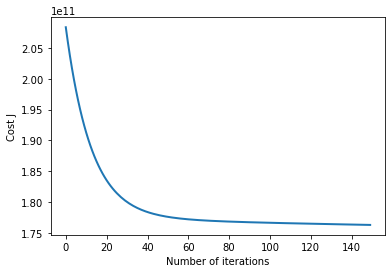

In [46]:
# Choose some alpha value - change this
alpha = 0.01
alpha2= 0.0002
alpha3=0.001
num_iters = 150
lam=0.6

# init theta and run gradient descent
theta = np.zeros(5)

theta, J_history = gradientDescentMulti(trainX_norm, trainY, theta, alpha, num_iters,lam)

# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2, label= 'h1')

pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')